In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
import sklearn.linear_model as lm

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [19]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = SVC(kernel='linear')
model.fit(X_test, y_test)

parameters = {'kernel':['linear','rbf','poly'], 'C':[0.1,0.4,0.5,0.6,1,3,10]}
clf = GridSearchCV(model, parameters, n_jobs=-1)
clf.fit(X_train, y_train)
preds_svm = clf.predict(X_test)

logreg = lm.LogisticRegressionCV()
logreg.fit(X_train, y_train)
preds_logreg = logreg.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(preds_svm, y_test)
print confusion_matrix(preds_logreg, y_test)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


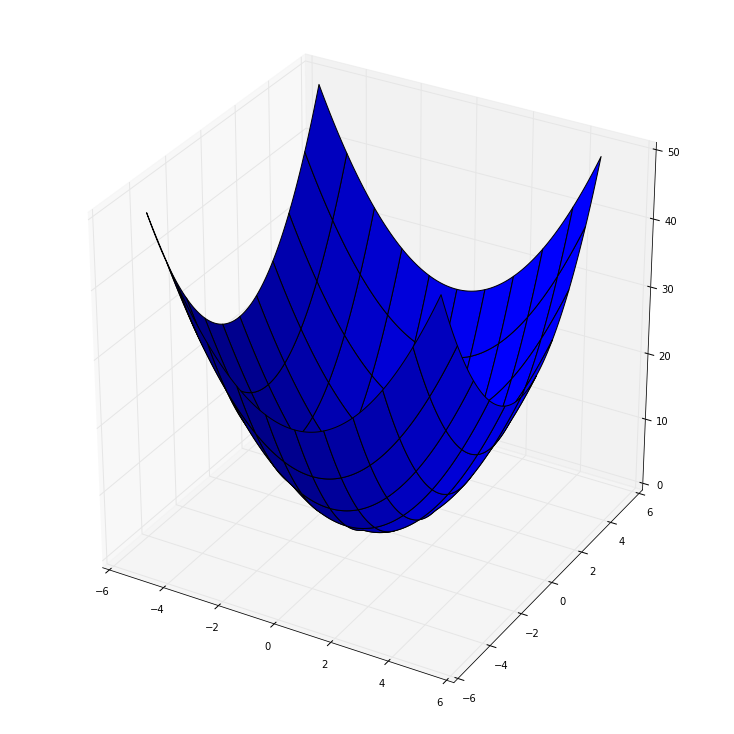

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Euclidean(x):
    return (x[0]**2 + x[1]**2)**0.5

def Poly(x):
    return (x[0]**2 + x[1]**2)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x,y = np.meshgrid(x,y)
z = map(Poly, zip(x,y))

plt.figure(figsize=(10,10))
ax = Axes3D(plt.gcf())
ax.plot_surface(x, y, z)
plt.show()